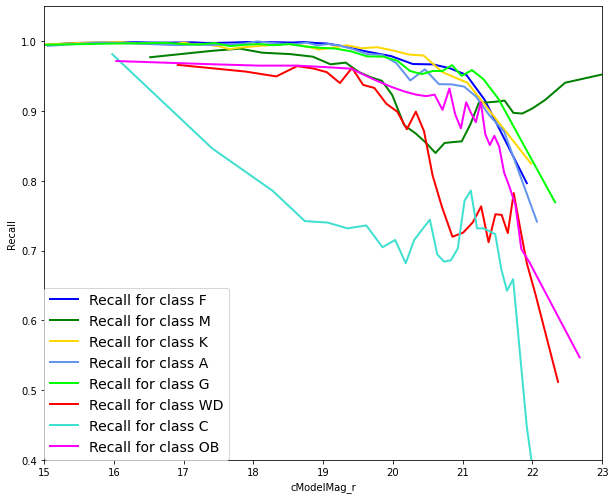

In [226]:
График recall для подклассов:

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls

%matplotlib inline

In [3]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score 
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import joblib
from tqdm.notebook import tqdm

# Подготовка данных

In [6]:
df = pd.read_pickle('df_done_sub.pkl') #выборка с уже объединеными подклассами звезд 
df.head()

,objID,ra,dec,z,zErr,class,subClass,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,cModelMag_z
0,1237679341106758387,37.470142,-5.554778,0.785255,0.000138,GALAXY,NaN,23.38412,23.00183,22.67571,21.95927,21.39581,20.01718,21.90474,21.99600,21.05722,20.29795
1,1237679341106757929,37.431501,-5.600435,1.285837,3.473993,QSO,NaN,22.52914,23.78679,23.21358,22.17294,21.80350,21.23949,20.26025,22.12909,21.14929,20.66354
2,1237679341106758149,37.388988,-5.556329,0.779955,0.000054,GALAXY,NaN,25.44541,23.13342,23.57675,24.34838,22.31492,20.38550,22.09762,23.74675,24.19759,20.62257
3,1237679440426172681,37.327114,-5.485252,0.714883,0.000028,GALAXY,NaN,25.43466,23.13782,23.31316,22.53812,22.60905,25.45580,22.96513,23.37321,22.59266,22.64923
4,1237679341106692861,37.315868,-5.519308,0.316563,0.000031,GALAXY,NaN,23.17536,21.34756,20.35171,20.05924,19.64511,21.14052,20.62957,19.60872,19.07587,18.90757


In [7]:
df.shape

(4614588, 17)

In [8]:
df[df['objID'] == 1237648720142401611]

,objID,ra,dec,z,zErr,class,subClass,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,cModelMag_z
953961,1237648720142401611,146.71421,-1.041304,0.021222,0.000009,GALAXY,STARFORMING,19.08621,17.41779,16.59581,16.03497,15.68077,16.81934,15.38817,14.67877,14.25035,13.97063


In [7]:
df = df.drop_duplicates('objID', keep = 'last')

In [8]:
df[df['objID'] == 1237648720142401611]

,objID,ra,dec,z,zErr,class,subClass,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,cModelMag_z
953961,1237648720142401611,146.71421,-1.041304,0.021222,0.000009,GALAXY,STARFORMING,19.08621,17.41779,16.59581,16.03497,15.68077,16.81934,15.38817,14.67877,14.25035,13.97063


In [26]:
df['ob'] = 1
df['ob'][df['subClass'] == 'OB'] = 0

<ipython-input-26-f642a49e4a12>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [89]:
df3 = df.copy()
labels = {'STAR':1, 'GALAXY':2, 'QSO':3}
df.replace({'class':labels}, inplace = True)
df.head()

,objID,ra,dec,z,zErr,class,subClass,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,cModelMag_z,ob
0,1237679341106758387,37.470142,-5.554778,0.785255,0.000138,2,NaN,23.38412,23.00183,22.67571,21.95927,21.39581,20.01718,21.90474,21.99600,21.05722,20.29795,1
1,1237679341106757929,37.431501,-5.600435,1.285837,3.473993,3,NaN,22.52914,23.78679,23.21358,22.17294,21.80350,21.23949,20.26025,22.12909,21.14929,20.66354,1
2,1237679341106758149,37.388988,-5.556329,0.779955,0.000054,2,NaN,25.44541,23.13342,23.57675,24.34838,22.31492,20.38550,22.09762,23.74675,24.19759,20.62257,1
3,1237679440426172681,37.327114,-5.485252,0.714883,0.000028,2,NaN,25.43466,23.13782,23.31316,22.53812,22.60905,25.45580,22.96513,23.37321,22.59266,22.64923,1
4,1237679341106692861,37.315868,-5.519308,0.316563,0.000031,2,NaN,23.17536,21.34756,20.35171,20.05924,19.64511,21.14052,20.62957,19.60872,19.07587,18.90757,1


In [101]:
X =  df.drop(['class','subClass', 'objID', 'z', 'zErr', 'ra', 'dec', 'ob'], axis = 1).values
y = df['ob'].values
c = df['class'].values
c

array([2, 3, 2, ..., 3, 2, 2])

In [106]:
def data_preparation(X, y, c, test_size = 0.8): #бработка данных для классификаторов (бинарных и нет)
    count = np.min(((y==1).sum(), (y==0).sum()))
    print(count, (y==0).sum(), (y==1).sum())
    ind0 = np.random.choice((y==0).sum(), size=count, replace=False)
    ind1 = np.random.choice((c==1).sum(), size=count//3, replace=False)
    ind2 = np.random.choice((c==2).sum(), size=count//3, replace=False)
    ind3 = np.random.choice((c==3).sum(), size=count//3, replace=False)
    X_pr = np.concatenate((X[y==0][ind0], X[c==1][ind1], X[c==2][ind2], X[c==3][ind3]))
    y_pr = np.concatenate((y[y==0][ind0], y[c==1][ind1], y[c==2][ind2], y[c==3][ind3]))
    X_train, X_test, y_train, y_test = train_test_split(X_pr, y_pr, test_size = 0.3, random_state = 42)

    X_test_not_scaling = X_test.copy()
    X_train_not_scaling = X_train.copy()

    robust = RobustScaler()

    X_train = robust.fit_transform(X_train)
    X_test = robust.transform(X_test)

    return X_train, X_test, y_train, y_test, X_test_not_scaling, X_train_not_scaling

In [107]:
X_train, X_test, y_train, y_test, X_test_not_scaling, X_train_not_scaling = data_preparation(X, y, c)

13731 13731 4600857


In [108]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19223, 10) (8239, 10) (19223,) (8239,)


In [109]:
from sklearn.manifold import TSNE
idx = np.random.permutation(3000)
x_tmp = TSNE(2).fit_transform(X_test[0:3000])
x_tmp = x_tmp[idx]
y_tmp = y_test[:3000][idx]

In [110]:
import seaborn as sns

In [121]:
aaa = (y_tmp != 1)
x_aaa = x_tmp[aaa]
y_aaa = y_tmp[aaa]

<AxesSubplot:>

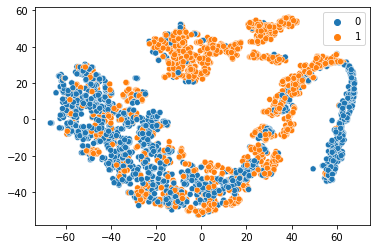

In [112]:
sns.scatterplot(x=x_tmp[:, 0], y=x_tmp[:, 1], hue=y_tmp)

<AxesSubplot:>

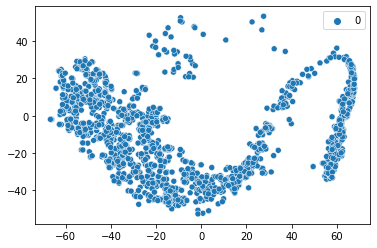

In [122]:
sns.scatterplot(x=x_aaa[:, 0], y=x_aaa[:, 1], hue=y_aaa)

In [76]:
def print_plot2(ml, X_sub, y_sub, X_sub_test_not_scaling):
    
    X_test_not_scaling = X_sub_test_not_scaling[X_sub_test_not_scaling[:,7].argsort()]
    X_test = X_sub[X_sub_test_not_scaling[:,7].argsort()]
    y_test = y_sub[X_sub_test_not_scaling[:,7].argsort()]
    
    #shift = 1000
    #n = len(y_test)//shift
    n = 20
    shift = len(y_test)//n
    precision = []
    recall = []
    f1 = []
    r_mean = []
    y_pred_all = ml.predict(X_test)

    for i in range(0, n):
            h = classification_report(y_test[i*shift : (i+1) * shift], y_pred_all[i*shift : (i+1) * shift], output_dict=True, zero_division=0)
            precision.append(h['0']['precision'])
            recall.append(h['0']['recall'])
            f1.append(h['0']['f1-score'])
            r_mean.append(X_test_not_scaling[i*shift : (i+1) * shift][:,7].mean())
            
    plt.figure(figsize = (5,4))
    plt.title('Зависимость precision от признкака cModelMag_r:')
    plt.plot(r_mean, precision, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.figure(figsize = (5,4))
    plt.title('Зависимость recall от признкака cModelMag_r:')
    plt.plot(r_mean, recall, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.figure(figsize = (5,4))
    plt.title('Зависимость f1 от признкака cModelMag_r:')
    plt.plot(r_mean, f1, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

In [58]:
def roc(model, X_test, y_test, lab):
    from sklearn.metrics import roc_curve
    sns.set(font_scale=1.5)
    sns.set_color_codes("muted")

    plt.figure(figsize=(10, 8))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label=lab)
    lw = 2
    plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.savefig("ROC.png")
    plt.show()

In [114]:
import time
t = time.time()
rf = RandomForestClassifier(n_estimators=200, random_state=42, max_features=5, min_samples_leaf=1) 
rf.fit(X_train, y_train)
#rf = joblib.load('rf_new.pkl')
y_pred = rf.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
rf_train_acc = rf.score(X_train, y_train)
print('Training Score: ', rf_train_acc)
rf_test_acc = rf.score(X_test, y_test)
print('Testing Score: ', rf_test_acc)
print(-t + time.time())

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      4149
           1       0.88      0.86      0.87      4090

    accuracy                           0.87      8239
   macro avg       0.87      0.87      0.87      8239
weighted avg       0.87      0.87      0.87      8239

Confusion Matrix: 
 [[3684  465]
 [ 592 3498]]
Training Score:  1.0
Testing Score:  0.8717077315208156
13.640241622924805


In [56]:
rf.feature_importances_

array([0.16520472, 0.14718125, 0.05149733, 0.04324455, 0.08572939,
       0.07419156, 0.06909308, 0.04001667, 0.11026701, 0.21357445])

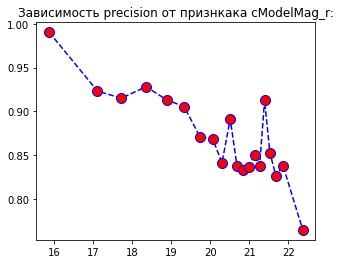

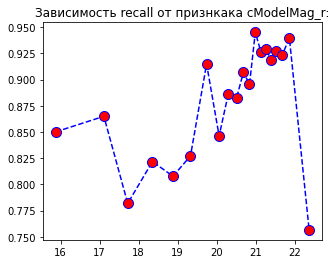

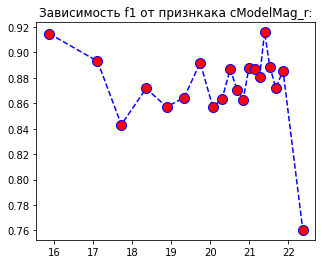

In [115]:
print_plot2(rf, X_test, y_test, X_test_not_scaling)

In [125]:
robust = RobustScaler()
robust.fit_transform(X_train_not_scaling)
X_tr = robust.transform(X)
X_str = robust.transform(X[c==1])
X_gal = robust.transform(X[c==2])
X_q = robust.transform(X[c==3])

In [120]:
y_pred = rf.predict(X_tr) #результаты на большой выборке 
print('Classification Report: \n', classification_report(y, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.03      0.97      0.06     13731
           1       1.00      0.90      0.95   4600857

    accuracy                           0.90   4614588
   macro avg       0.51      0.94      0.50   4614588
weighted avg       1.00      0.90      0.95   4614588

Confusion Matrix: 
 [[  13266     465]
 [ 440298 4160559]]


In [124]:
y_pred = rf.predict(X_str) #результаты на большой выборке только звезд 
print('Classification Report: \n', classification_report(y[c==1], y_pred))
print('Confusion Matrix: \n', confusion_matrix(y[c==1], y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.07      0.97      0.13     13731
           1       1.00      0.81      0.89    946632

    accuracy                           0.81    960363
   macro avg       0.53      0.89      0.51    960363
weighted avg       0.99      0.81      0.88    960363

Confusion Matrix: 
 [[ 13266    465]
 [183490 763142]]


In [127]:
y_pred = rf.predict(X_gal) #результаты на большой выборке только галактик
print('Classification Report: \n', classification_report(y[c==2], y_pred))
print('Confusion Matrix: \n', confusion_matrix(y[c==2], y_pred))

/home/nadia/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.98      0.99   2789052

    accuracy                           0.98   2789052
   macro avg       0.50      0.49      0.50   2789052
weighted avg       1.00      0.98      0.99   2789052

Confusion Matrix: 
 [[      0       0]
 [  46578 2742474]]


In [129]:
y_pred = rf.predict(X_q) #результаты на большой выборке только квазаров
print('Classification Report: \n', classification_report(y[c==3], y_pred))
print('Confusion Matrix: \n', confusion_matrix(y[c==3], y_pred))

/home/nadia/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.76      0.86    865173

    accuracy                           0.76    865173
   macro avg       0.50      0.38      0.43    865173
weighted avg       1.00      0.76      0.86    865173

Confusion Matrix: 
 [[     0      0]
 [210230 654943]]


In [ ]:
#плохо работает с квазарами 

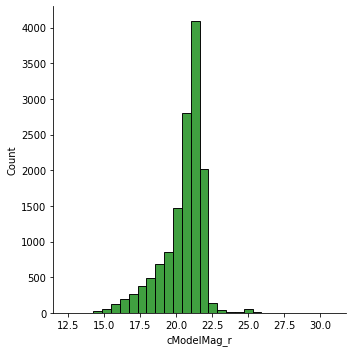

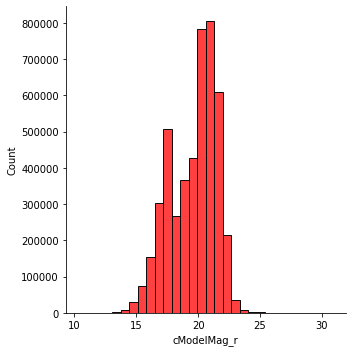

In [66]:
#fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (24, 6))
sns.displot(df[df['ob'] == 0].cModelMag_r,  bins = 30, color = 'g')
sns.displot(df[df['ob'] == 1].cModelMag_r,  bins = 30, color = 'r')

/home/nadia/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/nadia/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='cModelMag_z', ylabel='Density'>

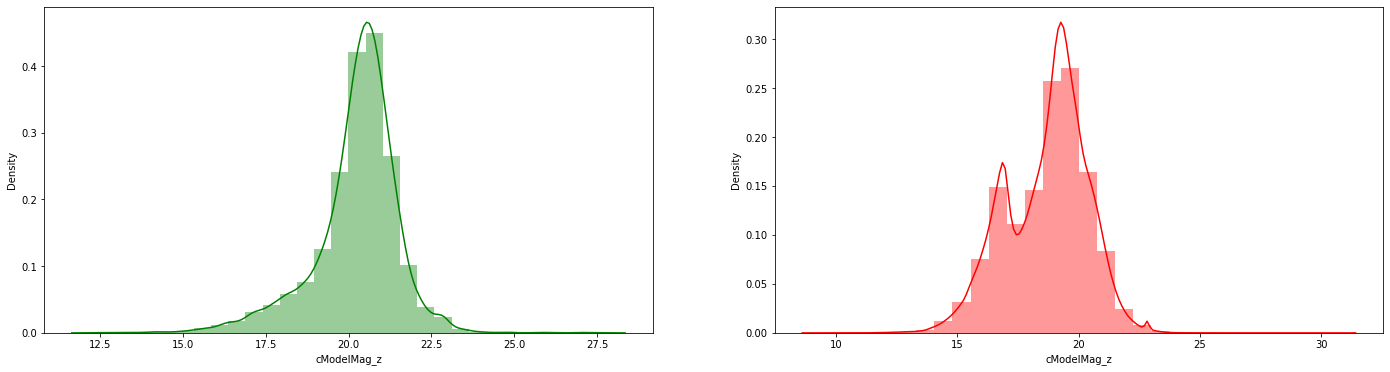

In [78]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (24, 6))
sns.distplot(df[df['ob'] == 0].cModelMag_z, ax = ax1,  bins = 30, color = 'g') #самый значимый параметр для классификации 
sns.distplot(df[df['ob'] == 1].cModelMag_z, ax = ax2,  bins = 30, color = 'r')

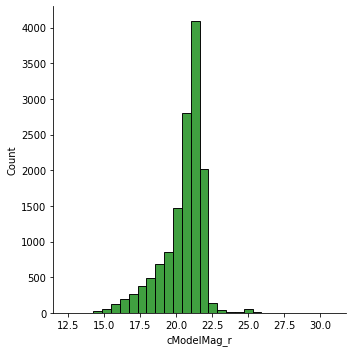

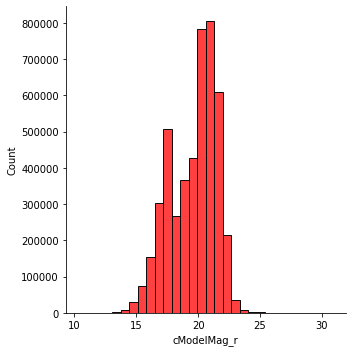

In [66]:
#fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (24, 6))
sns.displot(df[df['ob'] == 0].cModelMag_r,  bins = 30, color = 'g')
sns.displot(df[df['ob'] == 1].cModelMag_r,  bins = 30, color = 'r')

<AxesSubplot:xlabel='ob', ylabel='cModelMag_z'>

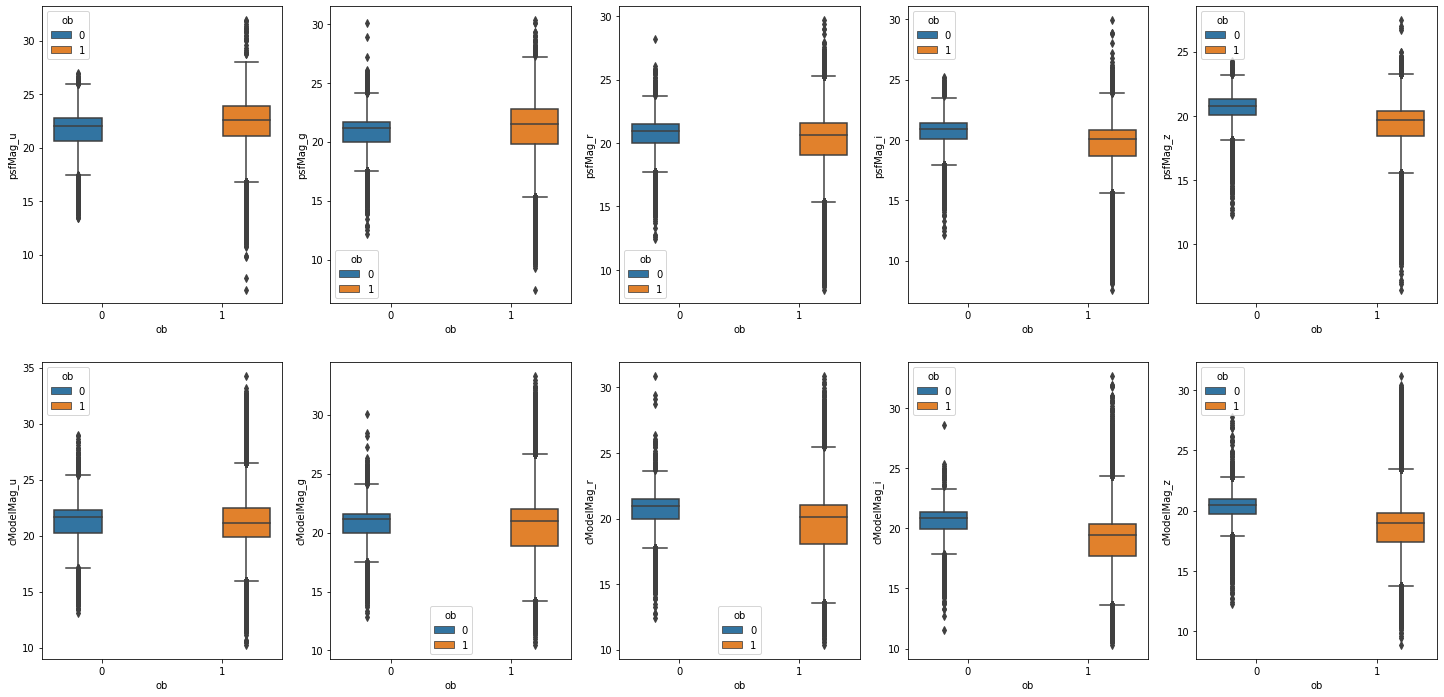

In [70]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(nrows=2, ncols=5, figsize = (25, 12))
sns.boxplot(ax=ax1, x = 'ob', y = 'psfMag_u', hue = 'ob', data = df) 
sns.boxplot(ax=ax2, x = 'ob', y = 'psfMag_g', hue = 'ob', data = df)
sns.boxplot(ax=ax3, x = 'ob', y = 'psfMag_r', hue = 'ob', data = df)
sns.boxplot(ax=ax4, x = 'ob', y = 'psfMag_i', hue = 'ob', data = df)
sns.boxplot(ax=ax5, x = 'ob', y = 'psfMag_z', hue = 'ob', data = df)
sns.boxplot(ax=ax6, x = 'ob', y = 'cModelMag_u', hue = 'ob', data = df)
sns.boxplot(ax=ax7, x = 'ob', y = 'cModelMag_g', hue = 'ob', data = df)
sns.boxplot(ax=ax8, x = 'ob', y = 'cModelMag_r', hue = 'ob', data = df)
sns.boxplot(ax=ax9, x = 'ob', y = 'cModelMag_i', hue = 'ob', data = df)
sns.boxplot(ax=ax10,x = 'ob', y = 'cModelMag_z', hue = 'ob', data = df)

In [73]:
df_pl = df.drop(['class','subClass', 'objID', 'z', 'zErr', 'ra', 'dec'], axis = 1)
df_pl.head()

,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,cModelMag_z,ob
0,23.38412,23.00183,22.67571,21.95927,21.39581,20.01718,21.90474,21.99600,21.05722,20.29795,1
1,22.52914,23.78679,23.21358,22.17294,21.80350,21.23949,20.26025,22.12909,21.14929,20.66354,1
2,25.44541,23.13342,23.57675,24.34838,22.31492,20.38550,22.09762,23.74675,24.19759,20.62257,1
3,25.43466,23.13782,23.31316,22.53812,22.60905,25.45580,22.96513,23.37321,22.59266,22.64923,1
4,23.17536,21.34756,20.35171,20.05924,19.64511,21.14052,20.62957,19.60872,19.07587,18.90757,1


In [ ]:
sns.pairplot(data = X_test, palette = 'Dark2', hue = y_test)

In [ ]:
psfMag_u 	psfMag_g 	psfMag_r 	psfMag_i 	psfMag_z 	cModelMag_u 	cModelMag_g 	cModelMag_r 	cModelMag_i 	cModelMag_z

In [84]:
joblib.dump(rf, 'rf_new.pkl')
#rf = rf = joblib.load('rf_new.pkl')

['rf_new.pkl']

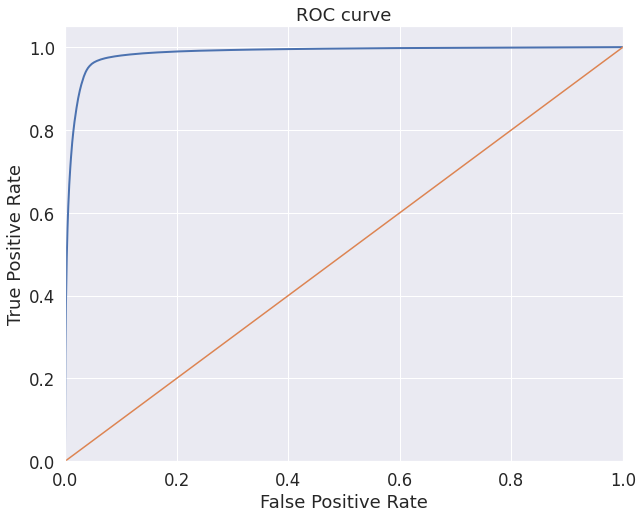

In [29]:
roc(rf, X_test, y_test, 2)

Точность увеличивается для более слабых объектов, что кажется неправдоподобным 

auc = 0.9413750779327104


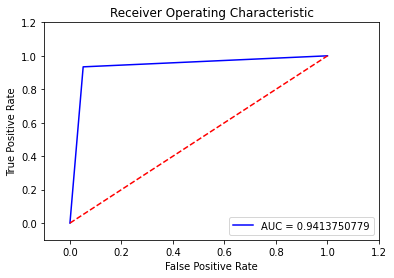

In [214]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y2_test, rf2.predict(X2_test), drop_intermediate=False)
#fpr, tpr, thresholds = roc_curve(y2_test, rf2.predict(X2_test))
auc = auc(fpr, tpr)
print('auc =', auc)

plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.10f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall')

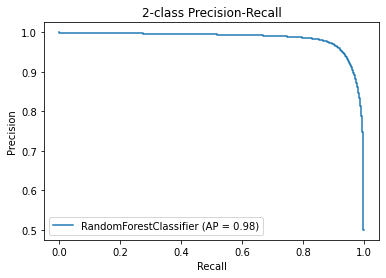

In [215]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(rf2, X2_test, y2_test)
disp.ax_.set_title('2-class Precision-Recall')

In [30]:
joblib.dump(rf2, 'rf2_new.pkl')

['rf2_new.pkl']

roc и precision-recall кривые для объектов с плохой точностью: 

In [216]:
index = (df['cModelMag_r'] < 22.5) & (df['cModelMag_r'] > 21)
X_train_rf, X_test_rf, y_train_rf, y_test_rf, X_test_not_scaling_rf, X_train_not_scaling_rf = data_preparation(X2[index], y2[index], test_size=0.8)

auc = 0.73500942751299


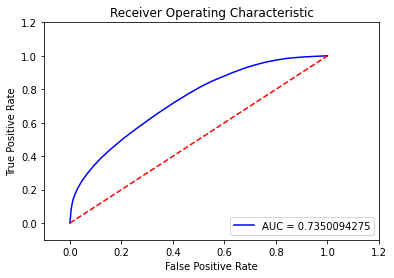

In [217]:
from sklearn.metrics import roc_curve, auc
y_pred_rf = rf2.predict_proba(X_test_rf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_rf, y_pred_rf, drop_intermediate=False)
#fpr, tpr, thresholds = roc_curve(y2_test, rf2.predict(X2_test))
auc = auc(fpr, tpr)
print('auc =', auc)

plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.10f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall')

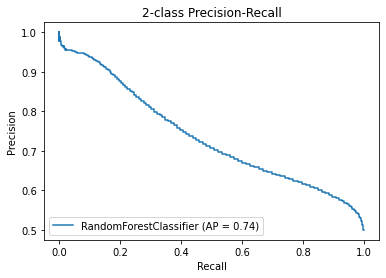

In [218]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(rf2, X_test_rf, y_test_rf)
disp.ax_.set_title('2-class Precision-Recall')

In [82]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

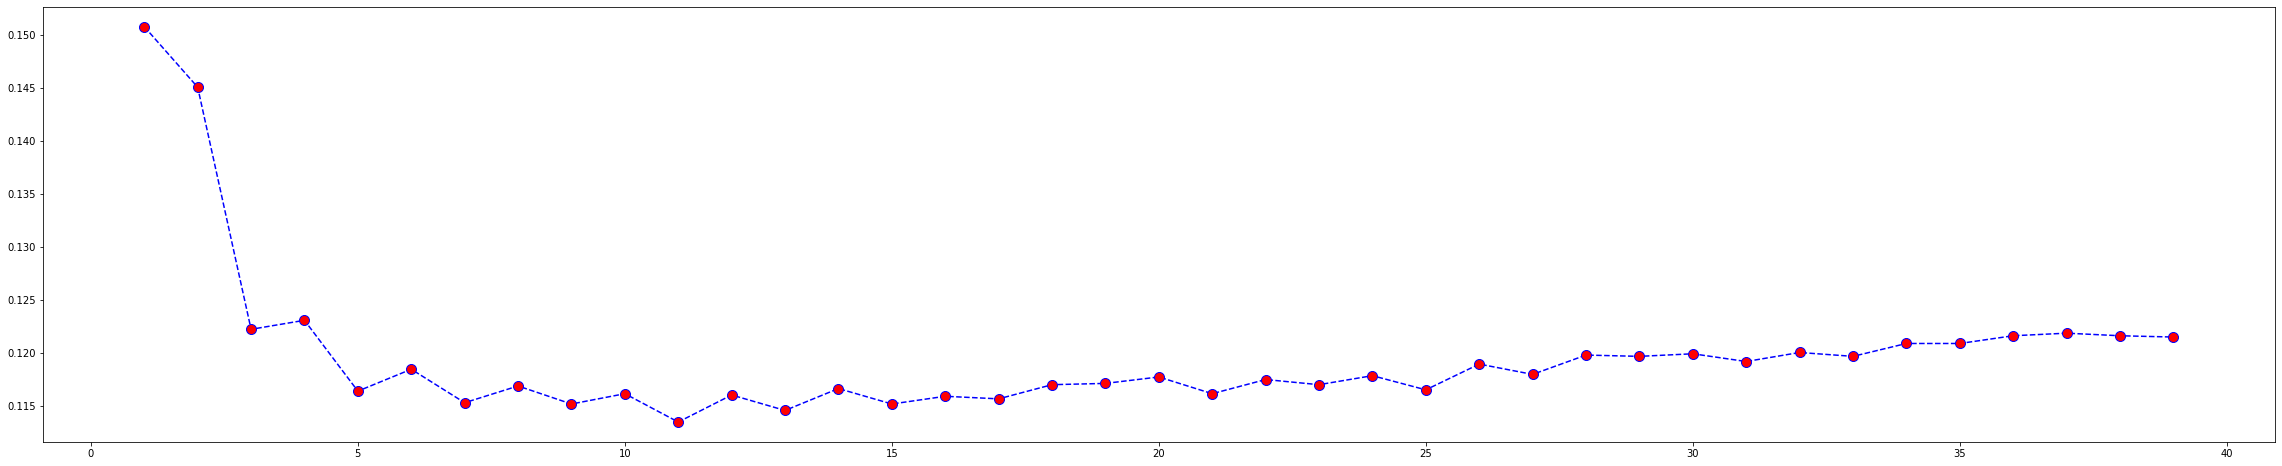

In [84]:
plt.figure(figsize = (40,8))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

In [87]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
knn_train_acc = knn.score(X_train, y_train)
print('Training Score: ', knn_train_acc)
knn_test_acc = knn.score(X_test, y_test)
print('Testing Score: ', knn_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      4132
           1       0.90      0.86      0.88      4107

    accuracy                           0.88      8239
   macro avg       0.88      0.88      0.88      8239
weighted avg       0.88      0.88      0.88      8239

Confusion Matrix: 
 [[3756  376]
 [ 583 3524]]
Training Score:  0.9155178692191646
Testing Score:  0.8836023789294817


# Функции для подбора параметров классификаторов

In [34]:
def visualize(test_metric_acc, train_metric_acc, test_metric_f1, train_metric_f1, grid, xlabel ='X'):
        train_acc, tast_acc = np.asarray(train_metric_acc), np.asarray(test_metric_acc)
        train_f1, test_f1 = np.asarray(train_metric_f1), np.asarray(test_metric_f1)
        print("Best accuracy_store is", max(test_acc), "with",
                                    grid[np.argmax(test_acc)], xlabel)
        plt.style.use('ggplot')
        plt.figure(figsize=(16, 8))
        plt.title("Accuracy")
        plt.plot(grid, test_acc, label="test")
        plt.plot(grid, train_acc, label="train")
        plt.xlabel(xlabel)
        plt.legend()
        plt.show()
                  
        print("Лучший f1_score ", max(test_f1), "with",
                                    grid[np.argmax(test_f1)],  xlabel)
        plt.style.use('ggplot')
        plt. figure(figsize=(16, 8))
        plt.title("F1_score")
        plt.plot(grid, test_f1, label="test")
        plt.plot(grid, train_f1, label="train")
        plt.xlabel(xlabel)
        plt.legend()
        plt.show()

In [36]:
def Anv(RFC,X_train, y_train, X_test, y_test):
    
    #print('я обучаюсь')

    RFC.fit(X_train, y_train)
    
    #print('я обучился')
    
    train_ans = RFC.predict(X_train)
    test_ans = RFC.predict(X_test)
    temp_train_acc = accuracy_score(y_train, train_ans)
    temp_train_f1 = classification_report(y_train, train_ans, output_dict=True, zero_division=0)['0']['f1-score']
    temp_test_acc = accuracy_score(y_test, test_ans)
    temp_test_f1 = classification_report(y_test, test_ans, output_dict=True, zero_division=0)['0']['f1-score']
    return temp_train_acc, temp_test_acc, temp_train_f1, temp_test_f1

In [110]:
train_acc = []
test_acc = []
train_f1 = []
test_f1 = []
trees_grid = [5, 10, 15, 30, 50, 100, 150, 200]
for ntrees in tqdm(trees_grid):
    RFC = RandomForestClassifier(n_estimators=ntrees, random_state=42)
    temp_train_acc, temp_test_acc, temp_train_f1, temp_test_f1 = Anv(RFC,X_train_rf, y_train_rf, X_test_rf, y_test_rf)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    train_f1.append(temp_train_f1)
    test_f1.append(temp_test_f1)

Best accuracy_store is 0.8654795714193507 with 200 trees number


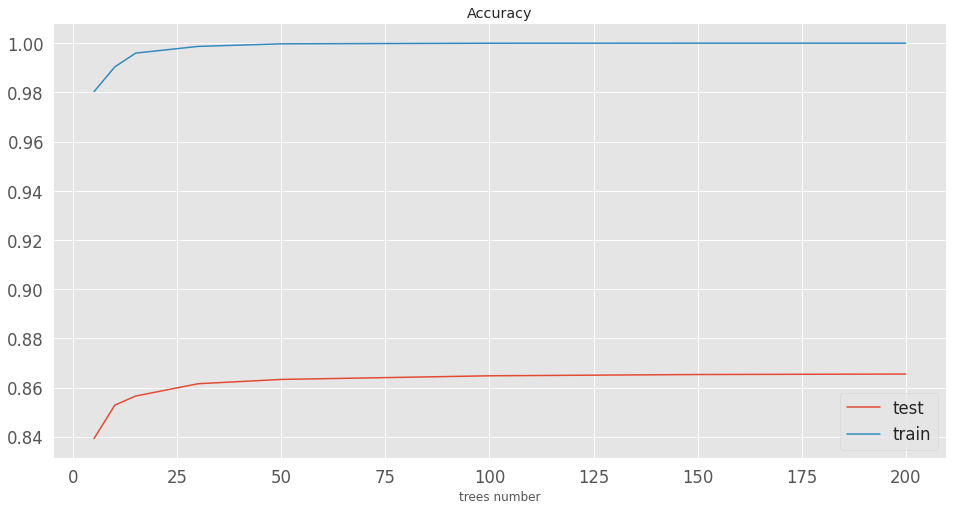

Лучший f1_score  0.8692313725490196 with 200 trees number


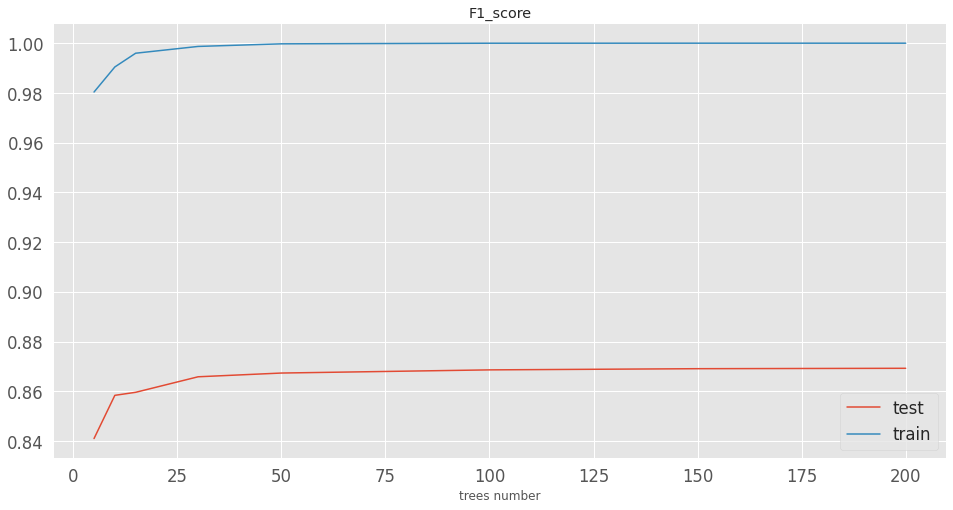

In [111]:
visualize(test_acc, train_acc, test_f1, train_f1, trees_grid, "trees number")

In [115]:
train_acc = []
test_acc = []
train_f1 = []
test_f1 = []
trees_grid = [1, 3, 4, 5, 10]
for ntrees in tqdm(trees_grid):
    RFC = RandomForestClassifier(n_estimators=100, random_state=42, max_features=ntrees)
    temp_train_acc, temp_test_acc, temp_train_f1, temp_test_f1 = Anv(RFC,X_train_rf, y_train_rf, X_test_rf, y_test_rf)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    train_f1.append(temp_train_f1)
    test_f1.append(temp_test_f1)

Best accuracy_store is 0.864769573355709 with 4 max_features


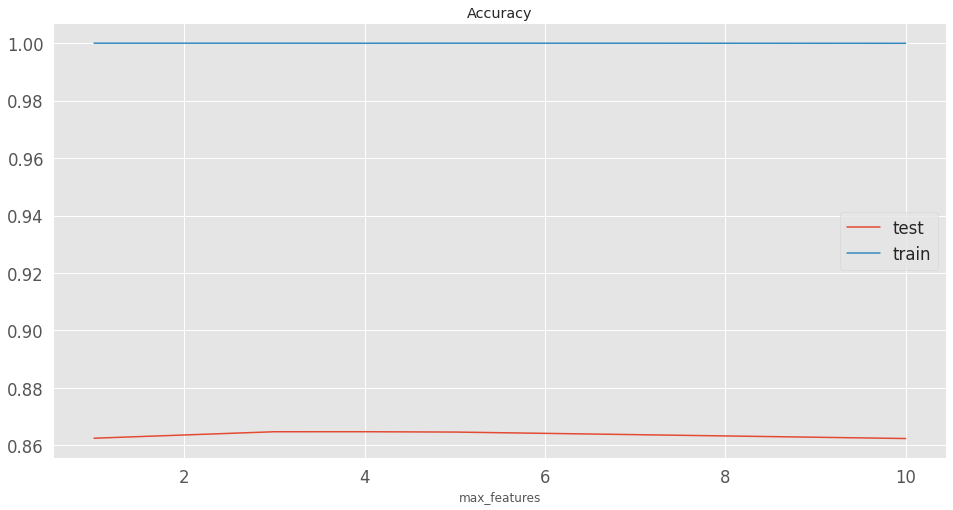

Лучший f1_score  0.8685944549627417 with 3 max_features


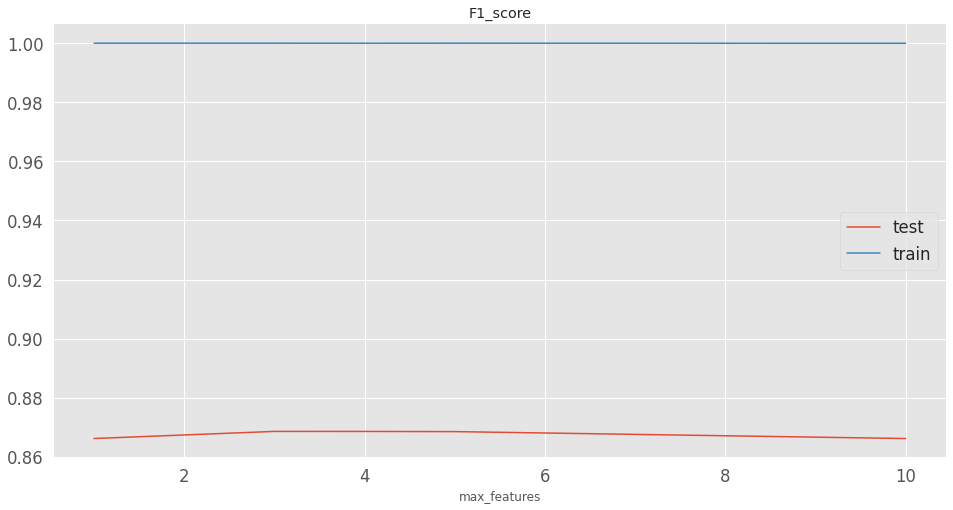

In [116]:
visualize(test_acc, train_acc, test_f1, train_f1, trees_grid, "max_features")

In [119]:
train_acc = []
test_acc = []
train_f1 = []
test_f1 = []
trees_grid = [1, 3, 5, 7, 10]
for ntrees in tqdm(trees_grid):
    RFC = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_leaf=ntrees, max_features=3)
    temp_train_acc, temp_test_acc, temp_train_f1, temp_test_f1 = Anv(RFC,X_train_rf, y_train_rf, X_test_rf, y_test_rf)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    train_f1.append(temp_train_f1)
    test_f1.append(temp_test_f1)

Best accuracy_store is 0.8651649131866004 with 3 min_samples_leaf


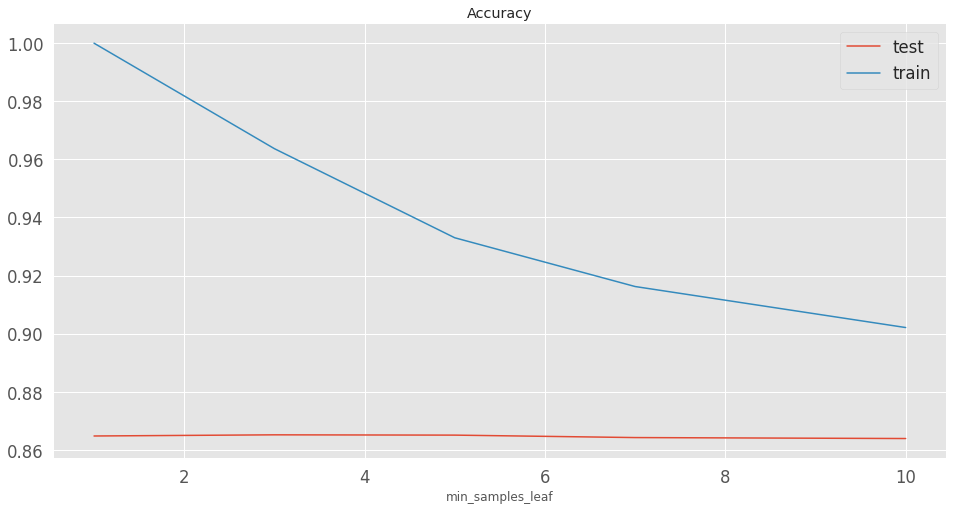

Лучший f1_score  0.8688865805617075 with 5 min_samples_leaf


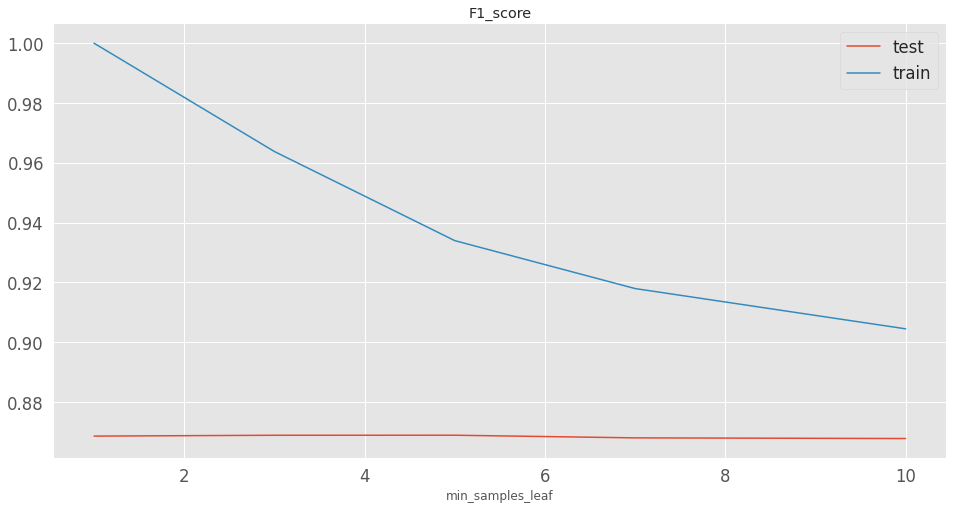

In [120]:
visualize(test_acc, train_acc, test_f1, train_f1, trees_grid, "min_samples_leaf")

In [38]:
train_acc = []
test_acc = []
train_f1 = []
test_f1 = []
trees_grid = [2, 3, 5, 7, 10]
for ntrees in tqdm(trees_grid):
    RFC = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split=ntrees, max_features=3)
    temp_train_acc, temp_test_acc, temp_train_f1, temp_test_f1 = Anv(RFC,X_train_rf, y_train_rf, X_test_rf, y_test_rf)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    train_f1.append(temp_train_f1)
    test_f1.append(temp_test_f1)

Best accuracy_store is 0.8649067320725489 with 10 min_samples_split


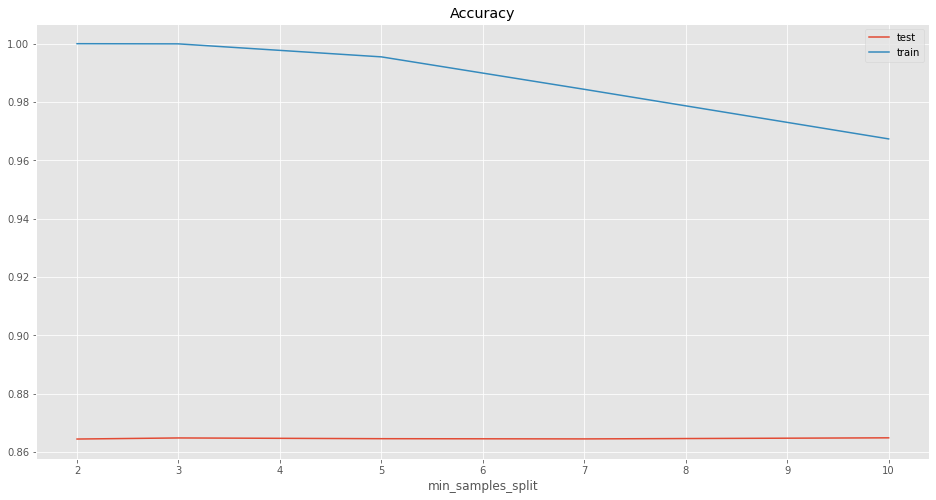

Лучший f1_score  0.8683005867639887 with 10 min_samples_split


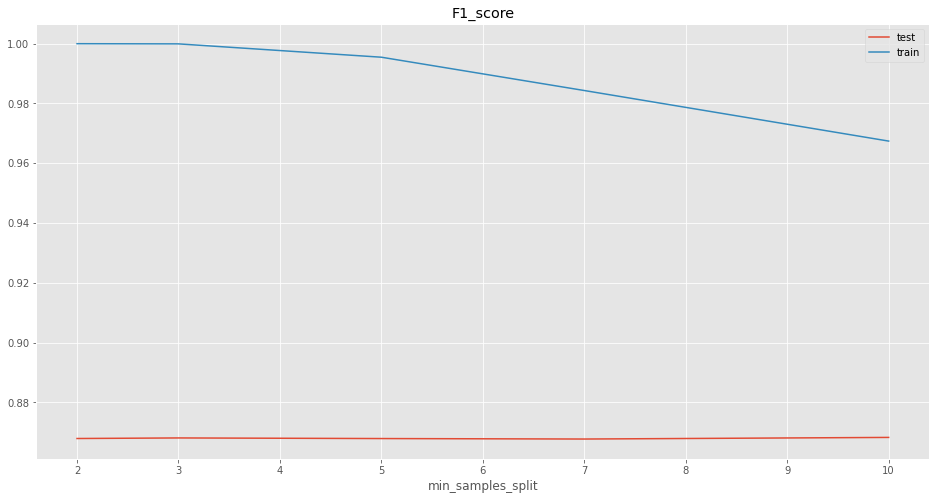

In [39]:
visualize(test_acc, train_acc, test_f1, train_f1, trees_grid, "min_samples_split")

In [121]:
def CV(RFC, X, y): #в данном случае не используется, чтобы уменьшить время работы
    temp_train_acc = []
    temp_test_acc = []
    temp_train_f1 = []
    temp_test_f1 = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        RFC.fit(X_train, y_train)
        train_ans = RFC.predict(X_train)
        test_ans = RFC.predict(X_test)
        temp_train_acc.append(accuracy_score(y_train, train_ans)) 
        temp_train_f1.append(f1_score(y_train, train_ans, average="binary"))
        temp_test_acc.append(accuracy_score(y_test, test_ans))
        temp_test_f1.append(f1_score(y_test, test_ans, average="binary"))
    return temp_train_acc, temp_test_acc, temp_train_f1, temp_test_f1

In [ ]:
X_rf, y_rf = X2[index], y2[index]
count = np.min(((y_rf==0).sum(), (y_rf==1).sum()))
ind0 = np.random.choice((y_rf==0).sum(), size=count, replace=False)
ind1 = np.random.choice((y_rf==1).sum(), size=count, replace=False)

robust = RobustScaler()
robust.fit_transform(X2_train_not_scaling)
#print(X[y==1].shape, len(y[y==2][ind2]), np.sum(y[y==2][ind2]))
#print((X[y==2][ind2] == X[y==1][ind1][23], g((X[y==2][ind2] == X[y==1][ind1][23])))
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.999, random_state = 42, stratify=y)
X_rf, y_rf = robust.transform(np.concatenate((X_rf[y_rf==0][ind0], X_rf[y_rf==1][ind1]))), np.concatenate((y_rf[y_rf==0][ind0], y_rf[y_rf==1][ind1]))
print(X_rf, y_rf)

# Проверка точности по подклассам звезд

In [17]:
df_sub = pd.read_pickle('df_done_sub.pkl') #выборка с уже объединеными подклассами звезд 
df_sub.head()

,objID,ra,dec,z,zErr,class,subClass,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,cModelMag_z
0,1237679341106758387,37.470142,-5.554778,0.785255,0.000138,GALAXY,NaN,23.38412,23.00183,22.67571,21.95927,21.39581,20.01718,21.90474,21.99600,21.05722,20.29795
1,1237679341106757929,37.431501,-5.600435,1.285837,3.473993,QSO,NaN,22.52914,23.78679,23.21358,22.17294,21.80350,21.23949,20.26025,22.12909,21.14929,20.66354
2,1237679341106758149,37.388988,-5.556329,0.779955,0.000054,GALAXY,NaN,25.44541,23.13342,23.57675,24.34838,22.31492,20.38550,22.09762,23.74675,24.19759,20.62257
3,1237679440426172681,37.327114,-5.485252,0.714883,0.000028,GALAXY,NaN,25.43466,23.13782,23.31316,22.53812,22.60905,25.45580,22.96513,23.37321,22.59266,22.64923
4,1237679341106692861,37.315868,-5.519308,0.316563,0.000031,GALAXY,NaN,23.17536,21.34756,20.35171,20.05924,19.64511,21.14052,20.62957,19.60872,19.07587,18.90757


In [18]:
labels = {'STAR':0, 'GALAXY':1, 'QSO':1}
df_sub.replace({'class':labels}, inplace = True)
df_sub.head()

,objID,ra,dec,z,zErr,class,subClass,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,cModelMag_z
0,1237679341106758387,37.470142,-5.554778,0.785255,0.000138,1,NaN,23.38412,23.00183,22.67571,21.95927,21.39581,20.01718,21.90474,21.99600,21.05722,20.29795
1,1237679341106757929,37.431501,-5.600435,1.285837,3.473993,1,NaN,22.52914,23.78679,23.21358,22.17294,21.80350,21.23949,20.26025,22.12909,21.14929,20.66354
2,1237679341106758149,37.388988,-5.556329,0.779955,0.000054,1,NaN,25.44541,23.13342,23.57675,24.34838,22.31492,20.38550,22.09762,23.74675,24.19759,20.62257
3,1237679440426172681,37.327114,-5.485252,0.714883,0.000028,1,NaN,25.43466,23.13782,23.31316,22.53812,22.60905,25.45580,22.96513,23.37321,22.59266,22.64923
4,1237679341106692861,37.315868,-5.519308,0.316563,0.000031,1,NaN,23.17536,21.34756,20.35171,20.05924,19.64511,21.14052,20.62957,19.60872,19.07587,18.90757


In [19]:
df_sub[df_sub['class']==0]['subClass'].value_counts()

F     367866
M     179953
K     152959
A      95455
G      93480
WD     34472
C      14451
OB     13731
LT      7996
Name: subClass, dtype: int64

In [20]:
X_sub = df_sub.drop(['class','subClass', 'objID', 'z', 'zErr', 'ra', 'dec'], axis = 1).values
y_sub = df_sub['class'].values
sub = df_sub['subClass']
robust = RobustScaler()
robust.fit_transform(X2_train_not_scaling)
X_sub_test_not_scaling = X_sub.copy()
X_sub = robust.transform(X_sub)

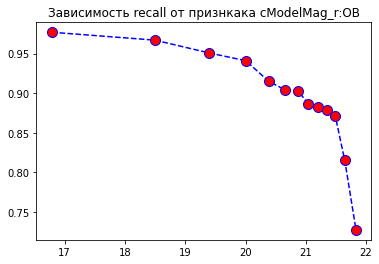

<Figure size 360x288 with 0 Axes>

In [24]:
print_plot2(rf2, X_sub[sub == 'OB'], y_sub[sub == 'OB'], X_sub_test_not_scaling[sub == 'OB'], 'OB')

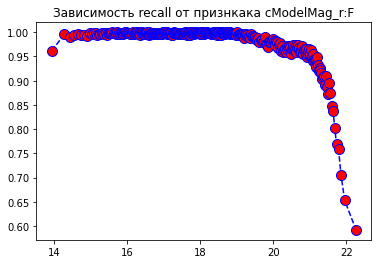

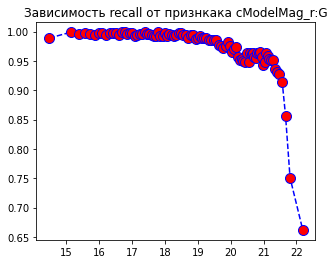

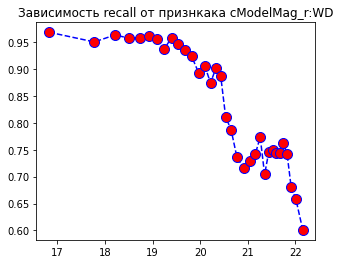

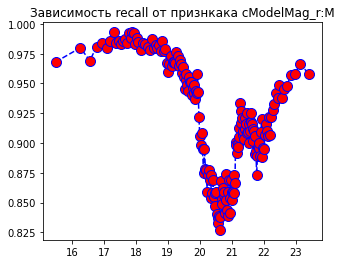

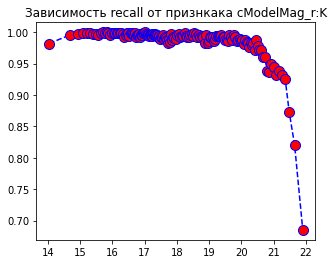

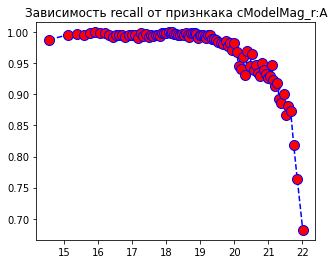

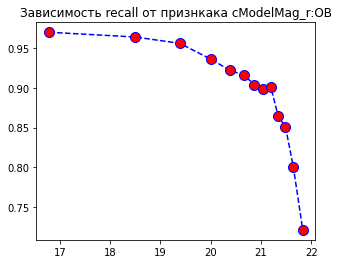

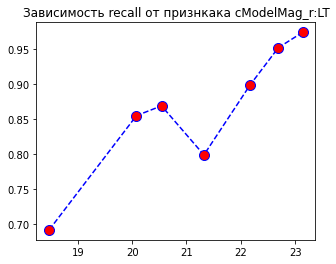

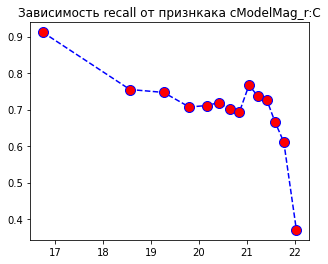

<Figure size 360x288 with 0 Axes>

In [228]:
for i in df_sub[df_sub['class']==0]['subClass'].unique():
    print_plot2(rf2, X_sub[sub == i], y_sub[sub == i], X_sub_test_not_scaling[sub == i], i)

In [37]:
def print_plot3(ml, X_sub, y_sub, X_sub_test_not_scaling, name):   #функция для построения общего графика для всех подклассов
    
    X_test_not_scaling = X_sub_test_not_scaling[X_sub_test_not_scaling[:,7].argsort()]
    X_test = X_sub[X_sub_test_not_scaling[:,7].argsort()]
    y_test = y_sub[X_sub_test_not_scaling[:,7].argsort()]
    
    #shift = 1000
    #n = len(y_test)//shift
    n = 30
    shift = len(y_test)//n
    precision = []
    recall = []
    f1 = []
    r_mean = []
    
    shift1 = []
    
    y_pred_all = ml.predict(X_test)

    for i in range(0, n):
            #h = classification_report(y_test[i*shift : (i+1) * shift], y_pred_all[i*shift : (i+1) * shift], output_dict=True, zero_division=0)
            #precision.append(h['0']['precision'])
            #recall.append(h['0']['recall'])
            #f1.append(h['0']['f1-score'])
            r_mean.append(X_test_not_scaling[i*shift : (i+1) * shift][:,7].mean())
            shift1.append(np.log10(len(y_test[i*shift : (i+1) * shift])))
            
    return r_mean, shift1, shift

In [28]:
subclass = df_sub[df_sub['class']==0]['subClass'].unique()[df_sub[df_sub['class']==0]['subClass'].value_counts()[df_sub[df_sub['class']==0]['subClass'].unique()].argsort()]

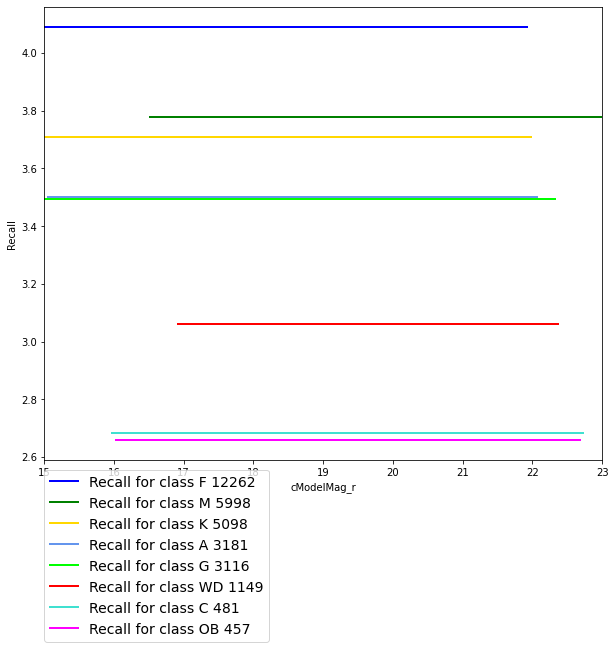

In [42]:
from itertools import cycle
# setup plot details
colors = cycle(['blue', 'g', 'gold', 'cornflowerblue', 'lime', 'r', 'turquoise', 'magenta'])
#n_classes = 9

plt.figure(figsize=(10, 10))

lines = []
labels = []

for i, color in zip(subclass[1:][::-1], colors):
    x, y, shift = print_plot3(rf2, X_sub[sub == i], y_sub[sub == i], X_sub_test_not_scaling[sub == i], i)
    #print(x, y)
    l, = plt.plot(x, y, color=color, lw=2)
    lines.append(l)
    labels.append('Recall for class '+ i + ' ' + str(shift))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([15, 23])
#plt.ylim([0.4, 1.05])
plt.xlabel('cModelMag_r')
plt.ylabel('Recall')
#plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -0.4), prop=dict(size=14))


plt.show()



'jhgj5'